# 用于处理大批量的原始数据，并转换为一个一个的numpy数据

In [67]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from input_process import *
from shutil import copy
import os
from concurrent.futures import ProcessPoolExecutor

211 528
(100, 700)


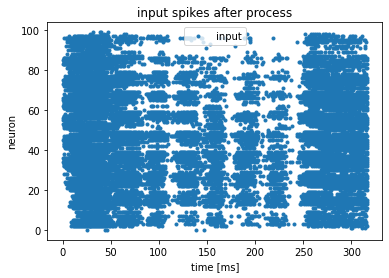

In [68]:
# test
data_path = 'F:/Files/PhD/Braille/Code/Events_Examples/Experiment_Data'
file_name = 'taps_trial_75_pose_0_events_on'
input_name = 'input_trial_0_pose_0.npy'

with open(data_path + '/' + file_name, 'rb') as file:
    data = pickle.load(file)

data = clip_pretime(data, 700)
# data = clip_pretime(data, 1100)

input_psth = crop(data, 700).astype(np.int64)
# input_psth = crop(data, 1100).astype(np.int64)

# print(type(input_psth[0][0]))
plot_input(input_psth)

# np.save(data_path + '/' + input_name, input_psth)

213 520
(100, 350)


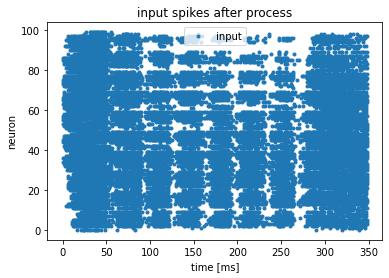

In [64]:
# 测试预处理时就加入compress time的结果
data_path = 'F:/Files/PhD/Braille/Code/Events_Examples/Experiment_Data'
file_name = 'taps_trial_75_pose_0_events_on'
with open(data_path + '/' + file_name, 'rb') as file:
    data = pickle.load(file)
data = clip_pretime(data, 700)
input_psth = crop(data, 700, temporal_compress=True, compress_time=350).astype(np.int64)
plot_input(input_psth)

In [27]:
a = np.array([[1, 2, 3, 4, 5],
              [0, 1, 2, 3, 4]])
b = np.array([[0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0]])
ratio = a.shape[1] / b.shape[1]
if ratio < 1:
    index_map = np.minimum(np.ceil(np.arange(a.shape[1])/ratio).astype(int), b.shape[1]-1)
else:
    index_map = np.minimum(np.floor(np.arange(a.shape[1])/ratio).astype(int), b.shape[1]-1)
for idx in range(a.shape[1]):
    b[:, index_map[idx]] += a[:, idx]
b

array([[1, 0, 2, 3, 0, 4, 5],
       [0, 0, 1, 2, 0, 3, 4]])

### 将所有原始数据中深度为2mm的复制进新的文件夹

In [14]:
file_path = r'D:/PersonalFiles/Bristol/GraduationThesis/Code/experiment_ABB_5depths/ABB_taps_5depths_110trials'#想拆分的文件夹所在路径,也就是一大堆文件所在的路径
save_dir = r'D:/PersonalFiles/Bristol/GraduationThesis/Code/experiment_ABB_5depths' #save_dir 是想把复制出来的文件存放在的路径
dir_name = "tmp" #新的文件夹的命名
 
# 获取 file_path 下的文件和文件夹列表
# 因为 file_path 里面没有文件夹，所以不处理有文件夹的情况
pathDir = os.listdir(file_path) #os.listdir(file_path) 是获取指定路径下包含的文件或文件夹列表
for filename in pathDir: #遍历pathDir下的所有文件filename
	if filename[-8] == '2':
		# print(filename)
		from_path = os.path.join(file_path, filename) #旧文件的绝对路径(包含文件的后缀名)
		to_path = save_dir + "\\" + dir_name          #新文件的绝对路径
 
		if not os.path.isdir(to_path):# 如果 to_path 目录不存在，则创建
			os.makedirs(to_path)
	
	copy(from_path, to_path)#完成复制黏贴

### 选取100个作为训练组批量处理后放入processedData文件夹

In [ ]:
data_path = 'F:\Files\PhD/Braille/Code\Events_Examples\Experiment_Data'
raw_place = 'rawData'
# raw_place = 'temp'
processed_place = 'processedData'

for filename in os.listdir(data_path + '/' + raw_place):
    # print(filename)
    # print(filename[5:-10])
    # break
    with open(data_path + '/' + raw_place + '/' + filename, 'rb') as file:
        data = pickle.load(file)

    data = clip_pretime(data, 700)
    input_psth = crop(data, 700).astype(np.int8)

    np.save(data_path + '/' + processed_place + '/' + filename[5:-10] + '.npy', input_psth)

In [23]:
a = 'processedData_0_pose_0.npy'
i=100
a[:14] + str(i) + a[-11:]

'processedData_100_pose_0.npy'

In [24]:
# 可能需要的修改文件名称
i = 100
cnt = 0
dest = 'F:\Files\PhD\SNN\SNN test\SNN code\data/temp'
for root, dirs, files in os.walk('F:\Files\PhD\SNN\SNN test\SNN code\data/temp'):
    for f in files:
        new_name = f[:14] + str(i) + f[-11:]
        cnt += 1
        if(cnt==3):
            i += 1
            cnt = 0
        os.rename(os.path.join(root, f), os.path.join(dest, new_name))

### 测试处理好的单个数据，绘制输入图像检查

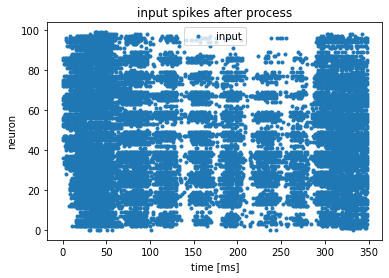

In [57]:
test = np.load('Experiment_Data/trial_100_pose_0.npy')
plot_input(test)

In [58]:
test.sum()

52024

In [56]:
30000/290

103.44827586206897